# SERIES TEMPORALES: MODELOS PREDICTIVOS
## MODELOS DE SERIES JERARQUICAS

`v2.2`
---



## Bibliografía

### Básica:

- Rob J. Hyndman and George Athanasopoulos (2018). **“Forecasting principles and practice, Hierarchical and Grouped Series”**. https://otexts.com/fpp3/hierarchical.html.


- Olivares, K.  Garza, F. Luo, D.  Challú, C. and Mergenthaler, M.  and A. Dubrawski, **"HierarchicalForecast: A Reference Framework for Hierarchical Forecasting in Python"**, https://arxiv.org/abs/2207.03517, Jun 2022.


### Adicional:


- Hyndman, R. A. Ahmed, G. Athanasopoulos, and H. L. Shang, **“Optimal combination forecasts for hierarchical time series”** Computational Statistics & Data Analysis, vol. 55, no. 9, pp. 2579–2589, Sep. 2011.

- Panagiotelis, G. Athanasopoulos, P. Gamakumara, and R. J. Hyndman, **“Forecast reconciliation: A geometric view with new insights on bias correction”** International Journal of Forecasting, vol. 37, no. 1, pp. 343–359, Jan. 2021.

- Wickramasuriya, G. Athanasopoulos, and R. J. Hyndman, **“Optimal Forecast Reconciliation for Hierarchical and Grouped Time Series Through Trace Minimization”** Journal of the American Statistical Association, vol. 114, no. 526, pp. 804–819, Apr. 2019



## Series Jerarquicas (Hierarchical)

- Las series de tiempo a menudo se pueden desagregar naturalmente por varios atributos de interés. 

- Por ejemplo, el número total de coches vendidos por un fabricante puede desglosarse por tipo de producto, como coches turismo, SUV, electrico, .... Cada uno de estos puede ser desagregado en categorías más finas. 

- Estas categorías están anidadas dentro de las categorías de grupos más grandes, por lo que la colección de series temporales sigue una estructura de agregación jerárquica. Por lo tanto, nos referimos a estos como "series temporales jerárquicas".

- Las series de tiempo jerárquicas a menudo surgen debido a divisiones geográficas. Por ejemplo, las ventas totales de coches se pueden desglosar por país, luego dentro de cada país por estado, dentro de cada estado por región, y así sucesivamente hasta el punto de venta.


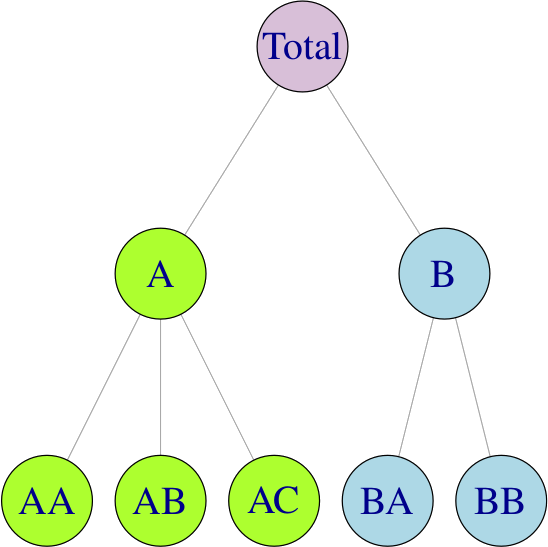

En tales escenarios, a menudo se requiere que los modelos proporcionen predicciones para todas las series desagregadas y agregadas. Un deseo natural es que esas predicciones sean **"coherentes"**, es decir, que la serie inferior se sume con precisión a los pronósticos de la serie agregada.

$n =$ total number of series in the hierarchy; $n=1+2+5=8$  

$m =$ the number of series at the bottom level; $m=5$  

Siempre $n>m$  


$$y_{t}=y_{AA,t}+y_{AB,t}+y_{AC,t}+y_{BA,t}+y_{BB,t}$$
$$y_{A,t}=y_{AA,t}+y_{AB,t}+y_{AC,t}\qquad \text{and} \qquad  y_{B,t}=y_{BA,t}+y_{BB,t}$$

$$y_{t}=y_{A,t}+y_{B,t}$$


In [71]:
import warnings
warnings.filterwarnings('ignore')

## Ejemplo Australia 

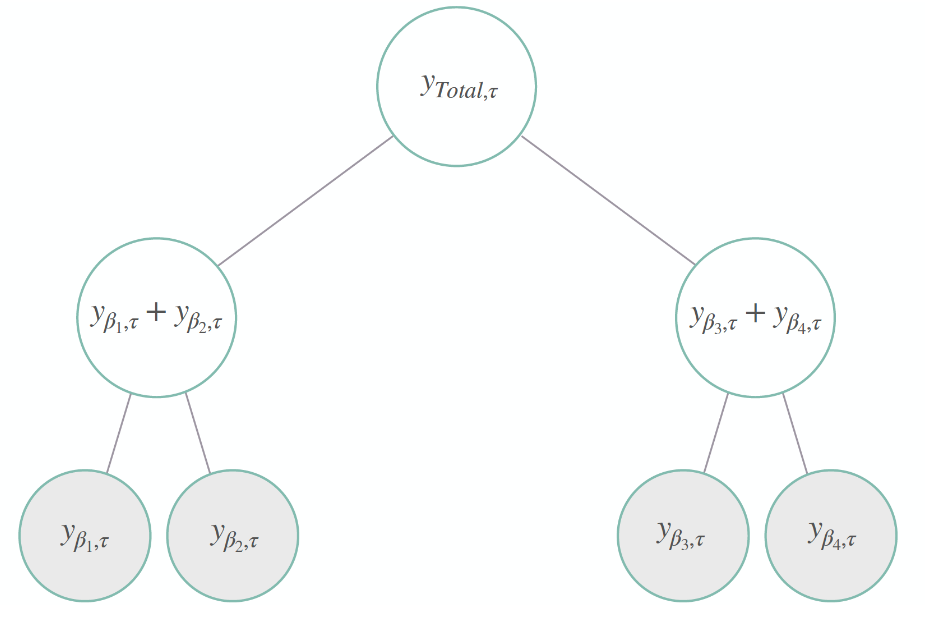



\begin{align}
        y_{\mathrm{Total},\tau} = y_{\beta_{1},\tau}+y_{\beta_{2},\tau}+y_{\beta_{3},\tau}+y_{\beta_{4},\tau} 
        \qquad \qquad \qquad \qquad \qquad \\
        \mathbf{y}_{[a],\tau}=\left[y_{\mathrm{Total},\tau},\; y_{\beta_{1},\tau}+y_{\beta_{2},\tau},\;y_{\beta_{3},\tau}+y_{\beta_{4},\tau}\right]^{\intercal} 
        \qquad
        \mathbf{y}_{[b],\tau}=\left[ y_{\beta_{1},\tau},\; y_{\beta_{2},\tau},\; y_{\beta_{3},\tau},\; y_{\beta_{4},\tau} \right]^{\intercal}
\end{align}

Las restricciones de agregación se puede expresar como una matriz:

\begin{align}
\mathbf{S}_{[a,b][b]}
=
\begin{bmatrix}
\mathbf{A}_{\mathrm{[a][b]}} \\ 
           \\
           \\
\mathbf{I}_{\mathrm{[b][b]}} \\
           \\
\end{bmatrix}
=
\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 \\
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
\end{align}

donde $\mathbf{A}_{[a,b][b]}$ agrega las series de abajo a arriba arriba (bottom) y $\mathbf{I}_{\mathrm{[b][b]}}$ es una matriz identidad. Entonce la serie jerarquica se puede representar como:

\begin{align}
\mathbf{y}_{[a,b],\tau} = \mathbf{S}_{[a,b][b]} \mathbf{y}_{[b],\tau}
\end{align}


Para lograr la "coherencia", la mayoría de las soluciones estadísticas al desafío de la previsión jerárquica implementan un proceso de reconciliación en dos etapas.

1º  obtenemos un conjunto del pronóstico base $\mathbf{\hat{y}}_{[a,b],\tau}$   

2º los reconciliamos en pronósticos coherentes $\mathbf{\tilde{y}}_{[a,b],\tau}$.  

La mayoría de los métodos de reconciliación jerárquica se pueden expresar mediante las siguientes transformaciones:

\begin{align}
\tilde{\mathbf{y}}_{[a,b],\tau} = \mathbf{S}_{[a,b][b]} \mathbf{P}_{[b][a,b]} \hat{\mathbf{y}}_{[a,b],\tau}
\end{align}

Es necesario tener instalado Hierarchicalforecast

https://nixtla.github.io/hierarchicalforecast/

pip install hierarchicalforecast

conda install -c conda-forge hierarchicalforecast

pip install --target=$nb_path -U numba statsforecast datasetsforecast

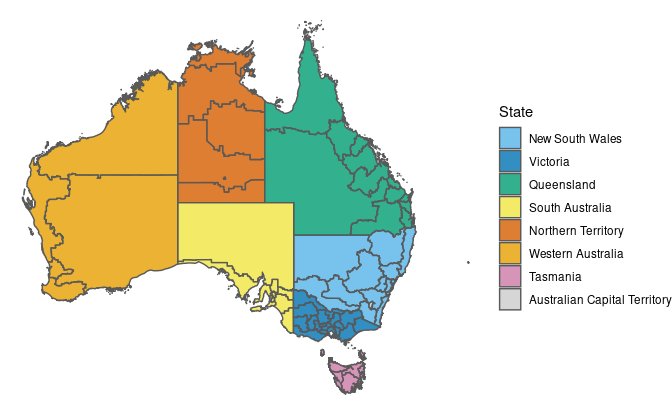

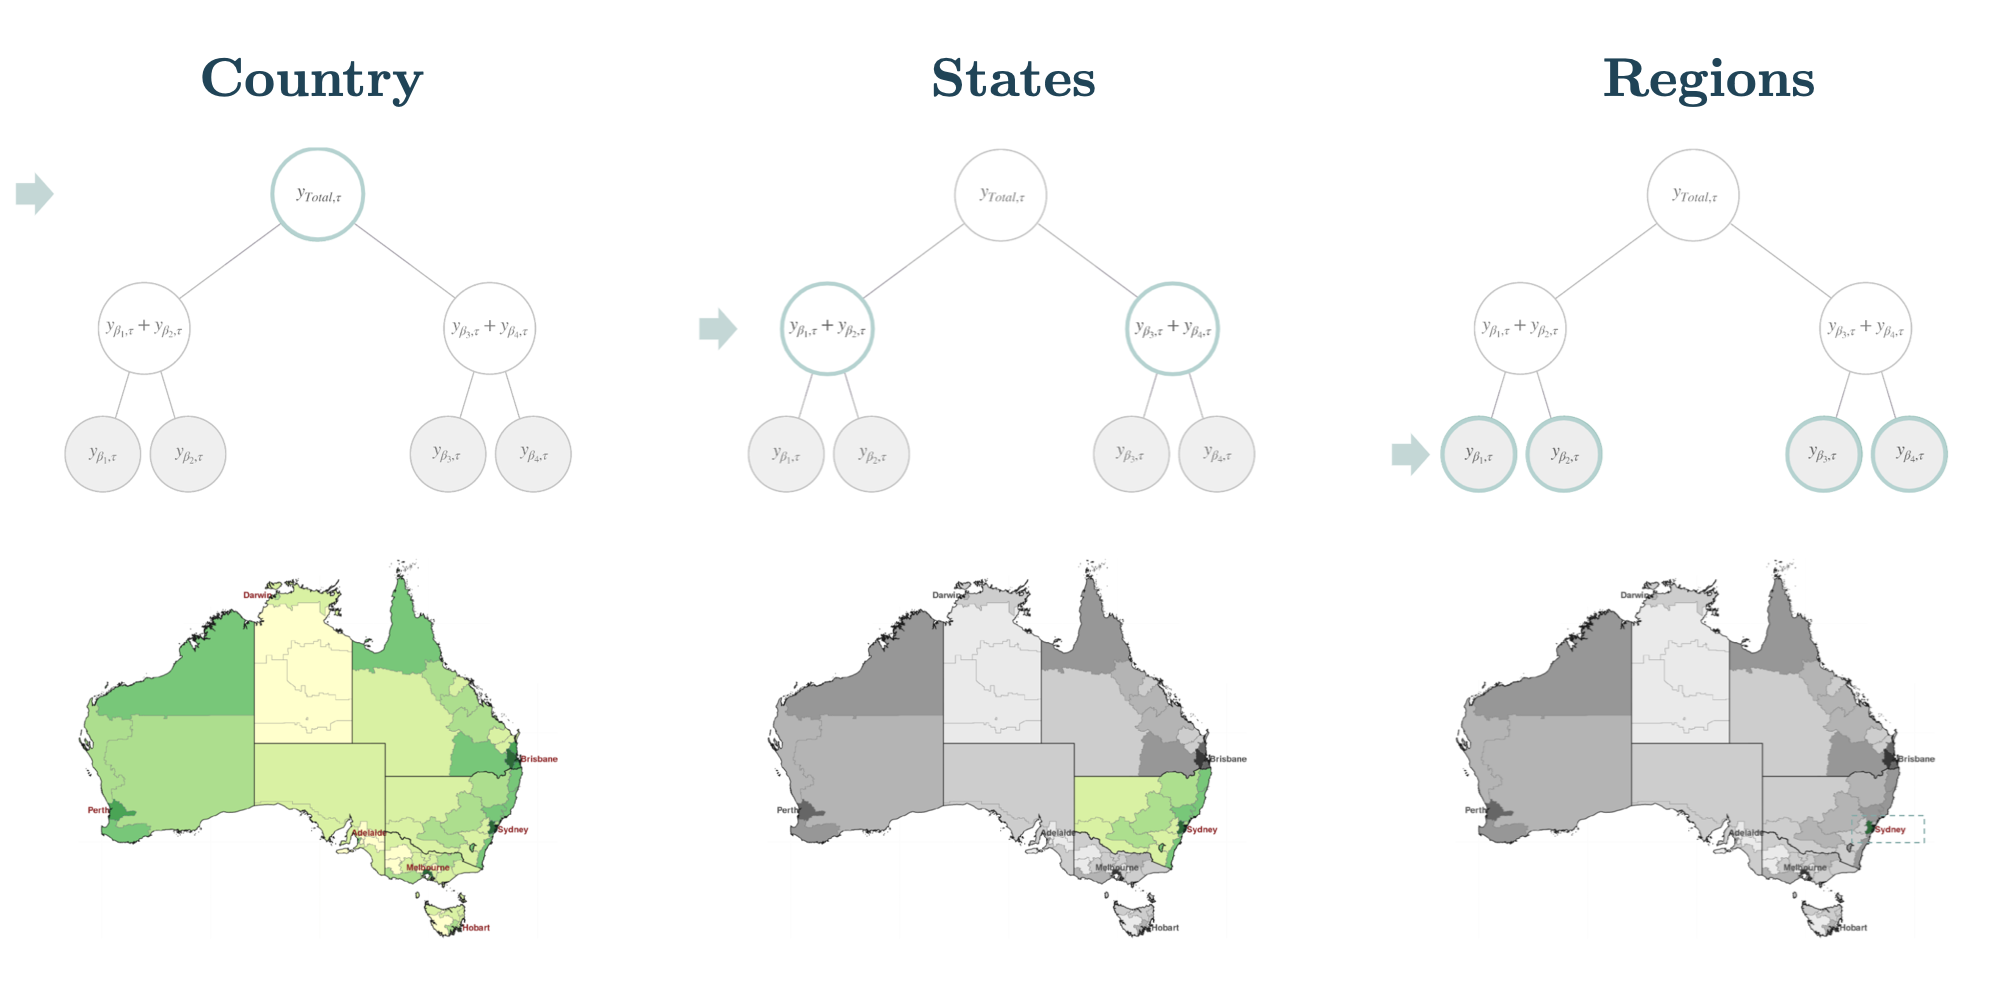

In [72]:
#!pip install statsforecast datasetsforecast

In [73]:
#!pip install hierarchicalforecast

In [74]:
import numpy as np
import pandas as pd

#obtain hierarchical dataset
from datasetsforecast.hierarchical import HierarchicalData

# compute base forecast no coherent
from statsforecast.core import StatsForecast
from statsforecast.models import AutoARIMA, Naive

#obtain hierarchical reconciliation methods and evaluation
from hierarchicalforecast.core import HierarchicalReconciliation
from hierarchicalforecast.evaluation import HierarchicalEvaluation
from hierarchicalforecast.methods import BottomUp, TopDown, MiddleOut


Usamos el TourismSmall dataset. 

La siguiente celda obtiene la serie temporal(Y_df) para los diferentes niveles de la jerarquía, la matriz de suma (S_df) que recupera el conjunto de datos completo de la jerarquía de nivel inferior y los índices de cada jerarquía indicados por etiquetas (tags).

In [75]:


# Load TourismSmall dataset
Y_df, S_df, tags = HierarchicalData.load('./data', 'TourismSmall')
Y_df['ds'] = pd.to_datetime(Y_df['ds'])




In [76]:
Y_df.tail()

,unique_id,ds,y
3199,nt-oth-noncity,2005-12-31,59
3200,nt-oth-noncity,2006-03-31,25
3201,nt-oth-noncity,2006-06-30,52
3202,nt-oth-noncity,2006-09-30,72
3203,nt-oth-noncity,2006-12-31,138


In [77]:
S_df.iloc[:5, :5]

,nsw-hol-city,nsw-hol-noncity,vic-hol-city,vic-hol-noncity,qld-hol-city
total,1.0,1.0,1.0,1.0,1.0
hol,1.0,1.0,1.0,1.0,1.0
vfr,0.0,0.0,0.0,0.0,0.0
bus,0.0,0.0,0.0,0.0,0.0
oth,0.0,0.0,0.0,0.0,0.0


In [78]:
# holidays, business, visiting other

tags

{'Country': array(['total'], dtype=object),
 'Country/Purpose': array(['hol', 'vfr', 'bus', 'oth'], dtype=object),
 'Country/Purpose/State': array(['nsw-hol', 'vic-hol', 'qld-hol', 'sa-hol', 'wa-hol', 'tas-hol',
        'nt-hol', 'nsw-vfr', 'vic-vfr', 'qld-vfr', 'sa-vfr', 'wa-vfr',
        'tas-vfr', 'nt-vfr', 'nsw-bus', 'vic-bus', 'qld-bus', 'sa-bus',
        'wa-bus', 'tas-bus', 'nt-bus', 'nsw-oth', 'vic-oth', 'qld-oth',
        'sa-oth', 'wa-oth', 'tas-oth', 'nt-oth'], dtype=object),
 'Country/Purpose/State/CityNonCity': array(['nsw-hol-city', 'nsw-hol-noncity', 'vic-hol-city',
        'vic-hol-noncity', 'qld-hol-city', 'qld-hol-noncity',
        'sa-hol-city', 'sa-hol-noncity', 'wa-hol-city', 'wa-hol-noncity',
        'tas-hol-city', 'tas-hol-noncity', 'nt-hol-city', 'nt-hol-noncity',
        'nsw-vfr-city', 'nsw-vfr-noncity', 'vic-vfr-city',
        'vic-vfr-noncity', 'qld-vfr-city', 'qld-vfr-noncity',
        'sa-vfr-city', 'sa-vfr-noncity', 'wa-vfr-city', 'wa-vfr-noncity',
     

Dividimos los datos en entrenamiento/test

In [79]:

#split train/test sets
Y_test_df  = Y_df.groupby('unique_id').tail(12)
Y_train_df = Y_df.drop(Y_test_df.index)
Y_test_df  = Y_test_df.set_index('unique_id')
Y_train_df = Y_train_df.set_index('unique_id')


In [80]:
Y_test_df

,ds,y
unique_id,,
total,2004-03-31,85852
total,2004-06-30,66981
total,2004-09-30,73840
total,2004-12-31,70217
total,2005-03-31,85992
...,...,...
nt-oth-noncity,2005-12-31,59
nt-oth-noncity,2006-03-31,25
nt-oth-noncity,2006-06-30,52



La siguiente celda calcula la predicción base para cada serie temporal utilizando los modelos auto_arima e ingenuo.  

Y_hat_df contiene las predicciones pero no son coherentes.

In [81]:

# Compute base auto-ARIMA predictions
fcst = StatsForecast(df=Y_train_df, 
                     models=[AutoARIMA(season_length=12), Naive()], 
                     freq='M', n_jobs=-1)
Y_hat_df = fcst.forecast(h=12)



Los métodos utilizados para hacer **coherentes** los pronósticos son: 

- **BottomUp**: La conciliación es una simple adición a los niveles superiores. 

- **TopDown:** el segundo método restringe las predicciones de nivel base a la serie de nivel agregado superior y luego las distribuye a la serie desagregada mediante el uso de proporciones. Utiliza el método de prediciónde las proporciones. 

- **MiddleOut**: las predicciones base son un nivel medio.

In [82]:

# Reconcile the base predictions
reconcilers = [
    BottomUp(),
    TopDown(method='forecast_proportions'),
    MiddleOut(middle_level='Country/Purpose/State',
              top_down_method='forecast_proportions')
]
hrec = HierarchicalReconciliation(reconcilers=reconcilers)
Y_rec_df = hrec.reconcile(Y_hat_df=Y_hat_df, Y_df=Y_train_df, 
                          S=S_df, tags=tags)


El paquete HierarchicalForecast incluye la clase HierarchicalEvaluation para evaluar las diferentes jerarquías y también es capaz de calcular métricas escaladas en comparación con un modelo de referencia.

In [83]:
def mse(y, y_hat):
    return np.mean((y-y_hat)**2)

evaluator = HierarchicalEvaluation(evaluators=[mse])

Hierarchical Evaluation Method.

Parameters:  
Y_hat_df: pd.DataFrame, Forecasts indexed by 'unique_id' with column 'ds' and models to evaluate.  
Y_test_df: pd.DataFrame, True values with columns ['ds', 'y'].  
tags: np.array, each str key is a level and its value contains tags associated to that level.  
Y_df: pd.DataFrame, Training set of base time series with columns ['ds', 'y'] indexed by unique_id.  
benchmark: str, If passed, evaluators are scaled by the error of this benchark.  

Returns:  
evaluation: pd.DataFrame with accuracy measurements across hierarchical levels.  

In [84]:
evaluator.evaluate(Y_hat_df=Y_rec_df, Y_test_df=Y_test_df, tags=tags)

,,AutoARIMA,Naive,AutoARIMA/BottomUp,Naive/BottomUp,AutoARIMA/TopDown_method-forecast_proportions,Naive/TopDown_method-forecast_proportions,AutoARIMA/MiddleOut_middle_level-Country/Purpose/State_top_down_method-forecast_proportions,Naive/MiddleOut_middle_level-Country/Purpose/State_top_down_method-forecast_proportions
level,metric,,,,,,,,
Overall,mse,1871861.665261,1953449.930712,1785268.951719,1953449.930712,1886451.103213,1953450.077714,1767305.813749,1953449.930712
Country,mse,74199775.73822,70537977.416667,69738334.704122,70537977.416667,74199775.73822,70537977.416667,68067688.365514,70537977.416667
Country/Purpose,mse,13612987.42582,15021186.854167,13042064.979425,15021186.854167,13335627.133582,15021189.419353,12643020.185484,15021186.854167
Country/Purpose/State,mse,775954.230324,858691.401786,741610.63441,858691.401786,810258.568489,858691.448579,775954.230324,858691.401786
Country/Purpose/State/CityNonCity,mse,289593.64853,342695.709821,289593.64853,342695.709821,315439.714209,342695.736825,302209.461913,342695.709821


In [85]:

evaluator.evaluate(Y_hat_df=Y_rec_df, Y_test_df=Y_test_df, tags=tags, benchmark='Naive')

,,AutoARIMA,Naive,AutoARIMA/BottomUp,Naive/BottomUp,AutoARIMA/TopDown_method-forecast_proportions,Naive/TopDown_method-forecast_proportions,AutoARIMA/MiddleOut_middle_level-Country/Purpose/State_top_down_method-forecast_proportions,Naive/MiddleOut_middle_level-Country/Purpose/State_top_down_method-forecast_proportions
level,metric,,,,,,,,
Overall,mse-scaled,0.958234,1.0,0.913906,1.0,0.965702,1.0,0.90471,1.0
Country,mse-scaled,1.051912,1.0,0.988664,1.0,1.051912,1.0,0.964979,1.0
Country/Purpose,mse-scaled,0.906252,1.0,0.868245,1.0,0.887788,1.0,0.841679,1.0
Country/Purpose/State,mse-scaled,0.903647,1.0,0.863652,1.0,0.943597,1.0,0.903647,1.0
Country/Purpose/State/CityNonCity,mse-scaled,0.845046,1.0,0.845046,1.0,0.920466,1.0,0.881859,1.0


# Ejemplo Población Penitenciaria Australiana (Grupos, no jerarquico)

En este cuaderno, explicaremos cómo producir pronósticos coherentes para la población penitenciaria australiana en diferentes grupos, replicando los resultados del libro Forecasting: Principles and Practice.

In [86]:
import numpy as np
import pandas as pd

# compute base forecast no coherent
from statsforecast.models import ETS
from statsforecast.core import StatsForecast

#obtain hierarchical reconciliation methods and evaluation
from hierarchicalforecast.utils import aggregate
from hierarchicalforecast.methods import BottomUp, MinTrace
from hierarchicalforecast.core import HierarchicalReconciliation
from hierarchicalforecast.evaluation import HierarchicalEvaluation

## Agregación bottom time series

El conjunto de datos solo contiene la serie temporal en el nivel más bajo, por lo que debemos crear la serie temporal para todas las jerarquías.

In [87]:
from pandas.tseries.offsets import MonthEnd
Y_df = pd.read_csv('https://OTexts.com/fpp3/extrafiles/prison_population.csv')
Y_df = Y_df.rename({'Count': 'y', 'Date': 'ds'}, axis=1)
Y_df.insert(0, 'Country', 'Australia')
Y_df = Y_df[['Country', 'State', 'Gender', 'Legal', 'Indigenous', 'ds', 'y']]
Y_df['ds'] = pd.to_datetime(Y_df['ds'])+ MonthEnd(1)
Y_df.head()

,Country,State,Gender,Legal,Indigenous,ds,y
0,Australia,ACT,Female,Remanded,ATSI,2005-03-31,0
1,Australia,ACT,Female,Remanded,Non-ATSI,2005-03-31,2
2,Australia,ACT,Female,Sentenced,ATSI,2005-03-31,0
3,Australia,ACT,Female,Sentenced,Non-ATSI,2005-03-31,5
4,Australia,ACT,Male,Remanded,ATSI,2005-03-31,7


El conjunto de datos se puede agrupar en la siguiente estructura agrupada.

In [88]:
hiers = [
    ['Country'],
    ['Country', 'State'], 
    ['Country', 'Gender'], 
    ['Country', 'Legal'], 
    ['Country', 'State', 'Gender', 'Legal']
]

In [89]:
hiers

[['Country'],
 ['Country', 'State'],
 ['Country', 'Gender'],
 ['Country', 'Legal'],
 ['Country', 'State', 'Gender', 'Legal']]


Usando la función `aggregate` de `HierarchicalForecast` podemos obtener el conjunto completo de series de tiempo.

In [90]:
Y_df, S_df, tags = aggregate(Y_df, hiers, lambda x: np.sum(x) / 1e3)
Y_df = Y_df.reset_index()


In [91]:
Y_df.head()

,unique_id,ds,y
0,Australia,2005-03-31,24296
1,Australia,2005-06-30,24643
2,Australia,2005-09-30,24511
3,Australia,2005-12-31,24393
4,Australia,2006-03-31,24524


In [92]:
Y_df.tail()

,unique_id,ds,y
2155,Australia/WA/Male/Sentenced,2015-12-31,3894
2156,Australia/WA/Male/Sentenced,2016-03-31,3876
2157,Australia/WA/Male/Sentenced,2016-06-30,3969
2158,Australia/WA/Male/Sentenced,2016-09-30,4076
2159,Australia/WA/Male/Sentenced,2016-12-31,4088


In [93]:
S_df.iloc[:5, :5]

,Australia/ACT/Female/Remanded,Australia/ACT/Female/Sentenced,Australia/ACT/Male/Remanded,Australia/ACT/Male/Sentenced,Australia/NSW/Female/Remanded
Australia,1.0,1.0,1.0,1.0,1.0
Australia/ACT,1.0,1.0,1.0,1.0,0.0
Australia/NSW,0.0,0.0,0.0,0.0,1.0
Australia/NT,0.0,0.0,0.0,0.0,0.0
Australia/QLD,0.0,0.0,0.0,0.0,0.0


In [94]:
tags

{'Country': array(['Australia'], dtype=object),
 'Country/State': array(['Australia/ACT', 'Australia/NSW', 'Australia/NT', 'Australia/QLD',
        'Australia/SA', 'Australia/TAS', 'Australia/VIC', 'Australia/WA'],
       dtype=object),
 'Country/Gender': array(['Australia/Female', 'Australia/Male'], dtype=object),
 'Country/Legal': array(['Australia/Remanded', 'Australia/Sentenced'], dtype=object),
 'Country/State/Gender/Legal': array(['Australia/ACT/Female/Remanded', 'Australia/ACT/Female/Sentenced',
        'Australia/ACT/Male/Remanded', 'Australia/ACT/Male/Sentenced',
        'Australia/NSW/Female/Remanded', 'Australia/NSW/Female/Sentenced',
        'Australia/NSW/Male/Remanded', 'Australia/NSW/Male/Sentenced',
        'Australia/NT/Female/Remanded', 'Australia/NT/Female/Sentenced',
        'Australia/NT/Male/Remanded', 'Australia/NT/Male/Sentenced',
        'Australia/QLD/Female/Remanded', 'Australia/QLD/Female/Sentenced',
        'Australia/QLD/Male/Remanded', 'Australia/QLD/Male

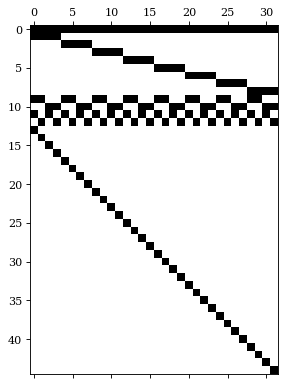

In [95]:
from hierarchicalforecast.utils import HierarchicalPlot
hplot = HierarchicalPlot(S=S_df, tags=tags)

hplot.plot_summing_matrix()

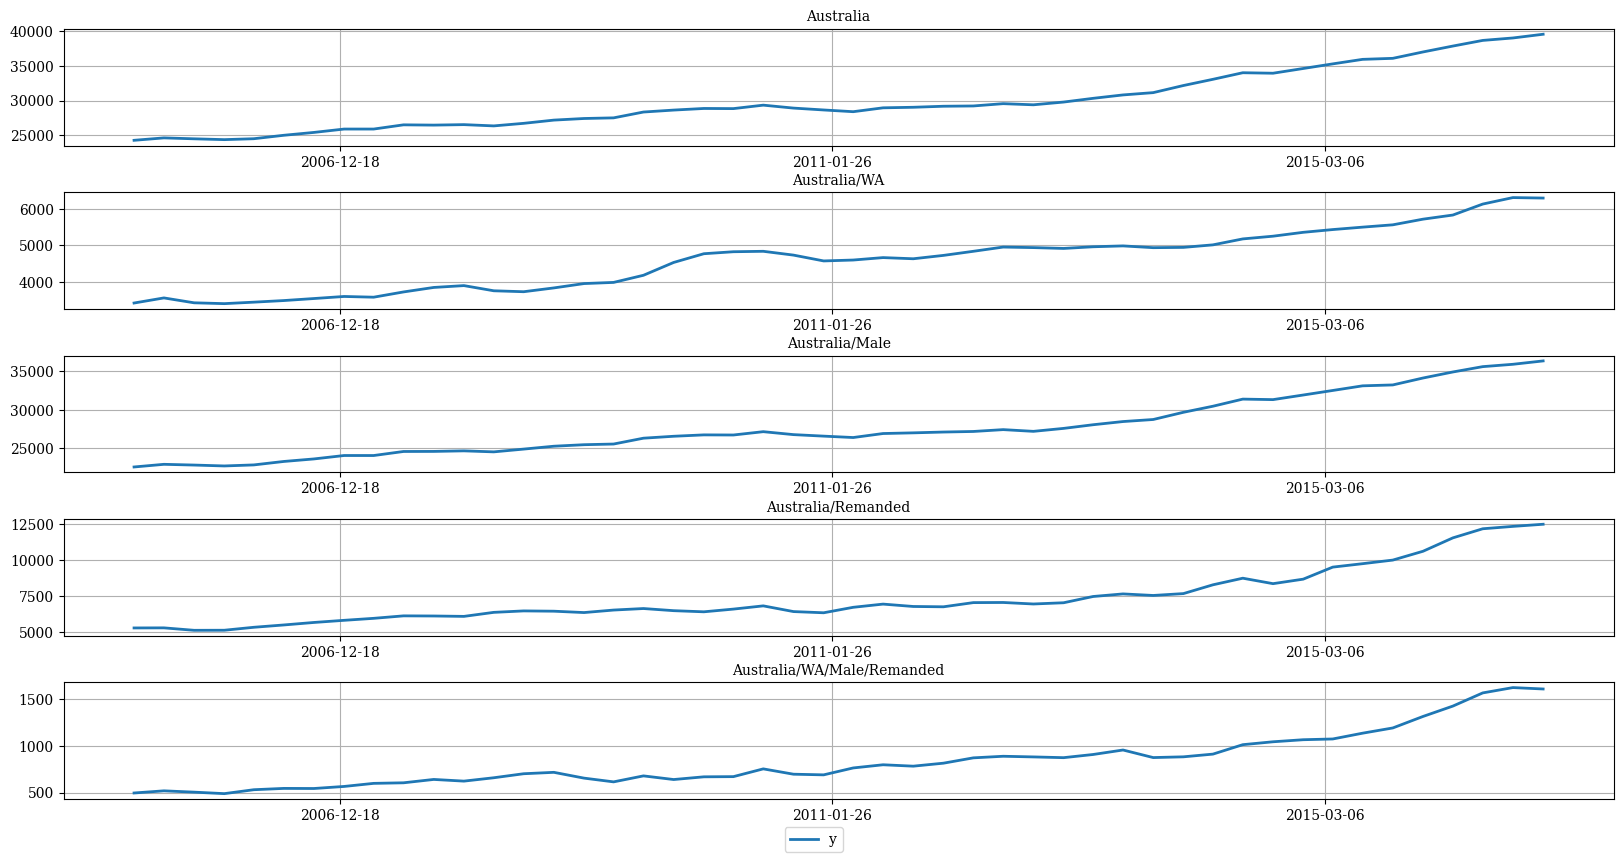

In [96]:
hplot.plot_hierarchically_linked_series(
    bottom_series='Australia/WA/Male/Remanded',
    Y_df=Y_df.set_index('unique_id')
)

**Conjuntos de entrenamiento/prueba**

Usamos los últimos dos años (8 trimestres) como conjunto de prueba.

In [97]:
Y_test_df = Y_df.groupby('unique_id').tail(8)
Y_train_df = Y_df.drop(Y_test_df.index)
Y_test_df = Y_test_df.set_index('unique_id')
Y_train_df = Y_train_df.set_index('unique_id')

## Cálculo de predicciones básicas

La siguiente celda calcula las **predicciones base** para cada serie temporal en `Y_df` utilizando los modelos `auto_ETS` y `naive`. Observe que `Y_hat_df` contiene los pronósticos pero no son coherentes.

In [98]:
#https://nixtla.github.io/statsforecast/models.html#ets

fcst = StatsForecast(df=Y_train_df,
                     models=[ETS(season_length=4, model='ZMZ')], 
                     freq='Q', n_jobs=-1)
Y_hat_df = fcst.forecast(h=8, fitted=True)
Y_fitted_df = fcst.forecast_fitted_values()

## Conciliar predicciones

La siguiente celda hace que las predicciones anteriores sean coherentes usando la clase `HierarchicalReconciliation`. Dado que la estructura de la jerarquía no es estricta, no podemos usar métodos como `TopDown` o `MiddleOut`. En este ejemplo usamos `BottomUp` y `MinTrace`.

In [99]:
reconcilers = [
    BottomUp(),
    MinTrace(method='mint_shrink')
]
hrec = HierarchicalReconciliation(reconcilers=reconcilers)
Y_rec_df = hrec.reconcile(Y_hat_df=Y_hat_df, Y_df=Y_fitted_df, S=S_df, tags=tags)

`Y_rec_df` contiene las predicciones

In [100]:
Y_rec_df.head()

,ds,ETS,ETS/BottomUp,ETS/MinTrace_method-mint_shrink
unique_id,,,,
Australia,2015-03-31,34799.496094,34946.523438,34925.189672
Australia,2015-06-30,35192.636719,35410.093750,35434.882290
Australia,2015-09-30,35188.214844,35580.218750,35472.806757
Australia,2015-12-31,35888.628906,35951.203125,35939.136613
Australia,2016-03-31,36045.437500,36415.914062,36244.765912




## Evaluación

El paquete `HierarchicalForecast` incluye la clase `HierarchicalE Evaluation` para evaluar las diferentes jerarquías y también es capaz de calcular métricas escaladas en comparación con un modelo de referencia.

In [101]:
def mase(y, y_hat, y_insample, seasonality=4):
    errors = np.mean(np.abs(y - y_hat), axis=1)
    scale = np.mean(np.abs(y_insample[:, seasonality:] - y_insample[:, :-seasonality]), axis=1)
    return np.mean(errors / scale)

eval_tags = {}
eval_tags['Total'] = tags['Country']
eval_tags['State'] = tags['Country/State']
eval_tags['Legal status'] = tags['Country/Legal']
eval_tags['Gender'] = tags['Country/Gender']
eval_tags['Bottom'] = tags['Country/State/Gender/Legal']
eval_tags['All series'] = np.concatenate(list(tags.values()))

evaluator = HierarchicalEvaluation(evaluators=[mase])
evaluation = evaluator.evaluate(
    Y_hat_df=Y_rec_df, Y_test_df=Y_test_df,
    tags=eval_tags,
    Y_df=Y_train_df
)
evaluation = evaluation.reset_index().drop(columns='metric').drop(0).set_index('level')
evaluation.columns = ['Base', 'BottomUp', 'MinTrace(mint_shrink)']
evaluation.applymap('{:.2f}'.format)

,Base,BottomUp,MinTrace(mint_shrink)
level,,,
Total,1.36,1.07,1.17
State,1.53,1.55,1.59
Legal status,2.40,2.48,2.38
Gender,1.09,0.82,0.93
Bottom,2.16,2.16,2.14
All series,1.99,1.98,1.98


## Plot Forecast

In [102]:
plot_df = pd.concat([Y_df.set_index(['unique_id', 'ds']), 
                     Y_rec_df.set_index('ds', append=True)], axis=1)
plot_df = plot_df.reset_index('ds')

In [103]:
plot_df

,ds,y,ETS,ETS/BottomUp,ETS/MinTrace_method-mint_shrink
unique_id,,,,,
Australia,2005-03-31,24296,NaN,NaN,NaN
Australia,2005-06-30,24643,NaN,NaN,NaN
Australia,2005-09-30,24511,NaN,NaN,NaN
Australia,2005-12-31,24393,NaN,NaN,NaN
Australia,2006-03-31,24524,NaN,NaN,NaN
...,...,...,...,...,...
Australia/WA/Male/Sentenced,2015-12-31,3894,3927.837646,3927.837646,3908.504409
Australia/WA/Male/Sentenced,2016-03-31,3876,3965.692139,3965.692139,3902.781167
Australia/WA/Male/Sentenced,2016-06-30,3969,4003.911621,4003.911621,3924.570718


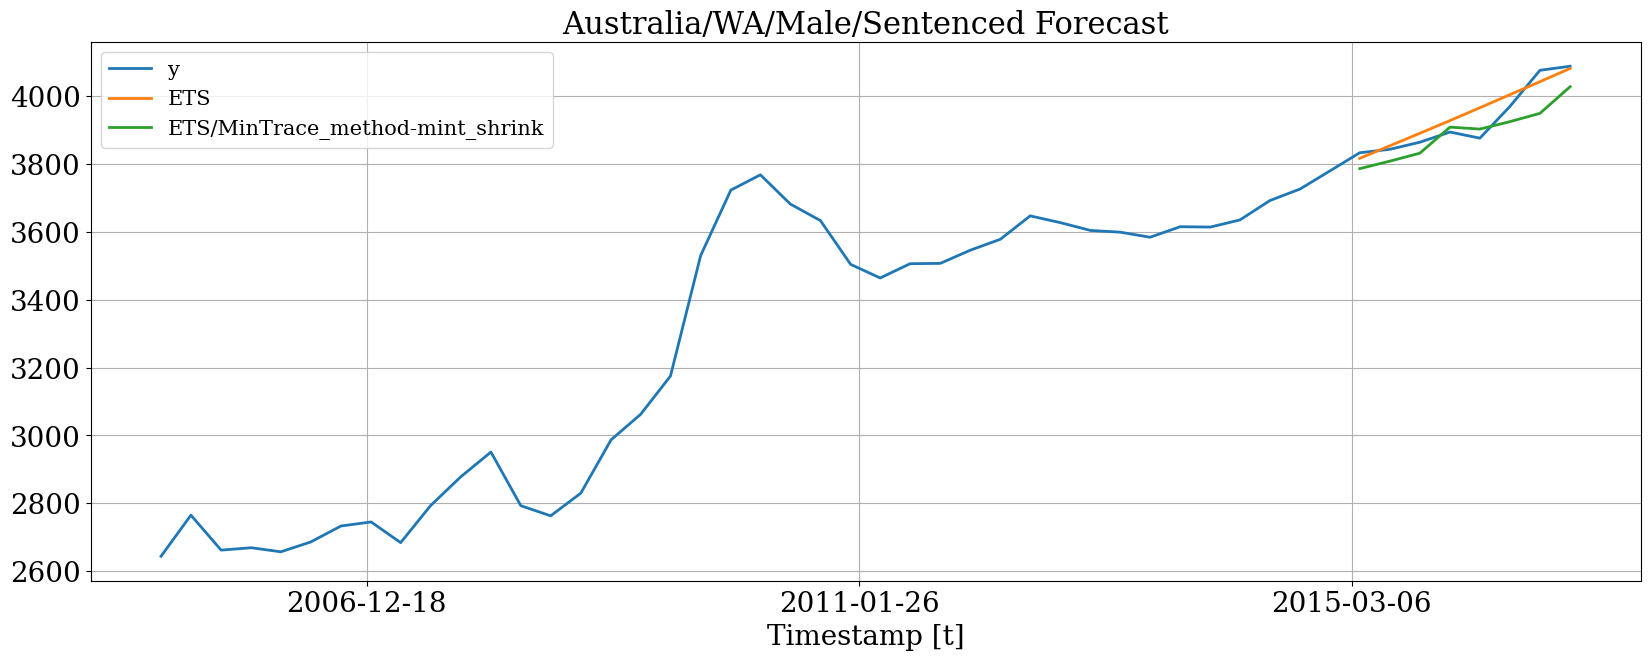

In [104]:
hplot.plot_series(
    series='Australia/WA/Male/Sentenced',
    Y_df=plot_df, 
    models=['y', 'ETS', 'ETS/MinTrace_method-mint_shrink']
)